In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ejercicio 1:

En una determinada colonia se desea conocer si existe alguna relación entre la edad de los vecinos y la *percepción de inseguridad*. Para ello se tomo una pequeña muestra de $10$ individuos, donde se calificaba la seguridad en una escala del $0-10$ donde el $0$ representa *totalmente seguro* y el $10$ representa *totalmente inseguro*:

<center><img src="capturas/imagen0.png"></center> 

Se pide:
- Estudiar la relación entre las dos variables “edad” y “percepción de inseguridad” a través de regresión lineal (considere un modelo lineal y uno cuadrático y compare).
- Representar gráficamente el mejor modelo. ¿Qué podemos decir de esta relación?
- ¿Qué puntuación sobre la inseguridad en el barrio obtendría un individuo de 25 años? ¿Y un individuo de 70?
- Estudiar la correlación de las variables e interpretar los coeficientes usando [el coeficiente de correlación de Pearson](https://es.wikipedia.org/wiki/Coeficiente_de_correlación_de_Pearson)
- ¿Qué valor de la edad presenta mayor residuo? ¿Cuál es residuo para la edad de 42 años? ¿Y para la edad de 31?


(0.0, 10.0)

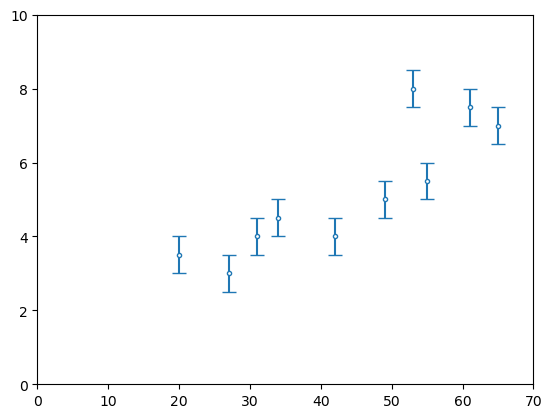

In [32]:
### Data
np.random.seed(45579)
# Respuesta
edad = [34, 27, 65, 20, 53, 49, 42, 31, 55, 61]
inseg = [4.5, 3., 7., 3.5, 8., 5., 4., 4., 5.5, 7.5]
N = len(edad)
sigIns = np.ones(N)*0.5 #0.2*np.abs(np.random.randn(N))

datos = np.array([edad, inseg, sigIns])
### Visualizando
fig, ax = plt.subplots()
ax.errorbar(edad, inseg, xerr=None, yerr=sigIns, capsize=5, ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
ax.set_xlim(0, 70)
ax.set_ylim(0, 10)

In [33]:
# a)
def fbase(k, xj):
    return xj**k

def Gnormalfit(datos, n, sigmEq=False):
    dataxs, datays, datasigs = datos
    N = len(dataxs)
    A = np.zeros((N, n))  # notar la dimensión
    
    for k in range(n):
        A[:, k] = fbase(k, dataxs)/datasigs  # A_{jk} = phi_k(x_j)/sigma_j
    bs = datays/datasigs  # b_j = y_j/sigma_j
    
    matI = A.T@A  # np.dot(A.T, A)
    InvmatI = np.linalg.inv(matI) 
    matD = A.T@bs
    cs = InvmatI@matD
    
    sigS = np.diagonal(InvmatI)
    chisq = np.sum((bs - A@cs)**2)  # (bs - A@cs).T@(bs - A@cs)
    
    sigmSqDat = None
    if sigmEq:
        A = np.zeros((N, n)) 
        for k in range(n):
            A[:, k] = fbase(k, dataxs)
        bs = datays
        sigmSqDat = np.sum((bs - A@cs)**2)/chisq
    
    return cs, chisq, sigS, sigmSqDat, InvmatI

In [34]:
csVal, sigVal, sigData, InvMa = [], [], [], []
for n in (2, 3):
    cs, chisq, sigS, sigD, inv = Gnormalfit(datos, n, sigmEq=False)
    csVal.append(cs)
    sigVal.append(np.sqrt(sigS))
    sigData.append(sigD)
    InvMa.append(inv)
    print()
    print('El valor para \chi^2 es ', chisq) 
    print('El valor para \chi^2 por grado de libertad es: ', chisq/(datos[0].size - cs.size))
    print('El valor de los parámetros c_i son ', cs)


El valor para \chi^2 es  28.077742228164848
El valor para \chi^2 por grado de libertad es:  3.509717778520606
El valor de los parámetros c_i son  [0.86777136 0.09913567]

El valor para \chi^2 es  26.766786029367644
El valor para \chi^2 por grado de libertad es:  3.8238265756239493
El valor de los parámetros c_i son  [2.55562255e+00 1.00858334e-02 1.03988794e-03]


(0.0, 10.0)

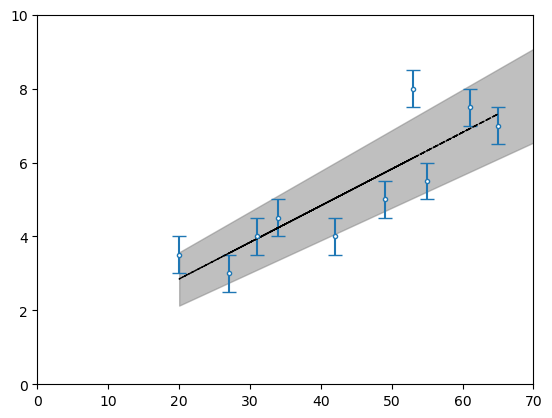

In [37]:
# b) mejor modelo es el lineal pq 3.5 está mas cerca de 1

xval = np.linspace(20, 70, 100)
modelo1 = lambda x, c0, c1: c0 +c1*x
fig, ax = plt.subplots()
ax.errorbar(edad, inseg, xerr=None, yerr=sigIns, capsize=5, ls='', marker='o', mfc='white', ms=3, mew=1, label=r'Datos')
ax.plot(datos[0], modelo1(datos[0], *csVal[0]), ls='--', lw=1, c='k', label=r'Base Pol. n=%d'%len(csVal[0]))
ax.fill_between(xval, modelo1(xval, *(csVal[0]+sigVal[0])), modelo1(xval, *(csVal[0]-sigVal[0])), color='gray', alpha=0.5)

ax.set_xlim(0, 70)
ax.set_ylim(0, 10)

In [40]:
# c)
print('La percepción de inseguridad de uno de 25 años es :', modelo1(25, *csVal[0]))
print('La percepción de inseguridad de uno de 70 años es :', modelo1(70, *csVal[0]))

La percepción de inseguridad de uno de 25 años es : 3.3461630294637392
La percepción de inseguridad de uno de 70 años es : 7.8072680387756135


In [47]:
 InvMa[0]

array([[ 2.52984576e-01, -5.21703835e-03],
       [-5.21703835e-03,  1.19383029e-04]])

In [46]:
# d)
Sxy = InvMa[0][0, 1]
Sx, Sy = sigVal[0]
coefPer = Sxy/(Sx*Sy)
print('La correlacion entre las variables es: ', coefPer)

La correlacion entre las variables es:  -0.9493048752211458


### Ejercicio 2:

Una empresa de manufacturas basa las predicciones de sus ventas anuales en los resultados oficiales de la demanda total en la industria. A continuación se dan los datos de demanda total y las ventas efectuadas por la empresa en los últimos 11 años.

<center><img src="capturas/imagen1.png"></center> 

Se pide:
- Econtrar y demostrar que modelo se ajusta mejor, uno lineal o cuadrático.
- Graficar los datos y el mejor modelo.
- ¿Existe una correlación entre las variables?

### Ejercicio 3:

En determinada zona se está investigando la relación entre el consumo de alcohol y el de otros estupefacientes entre la población juvenil. Se sabe que el consumo medio de alcohol es de $2.3$ veces por semana (con una desviación típica de $2.5$) mientras que el consumo medio de otros estupefacientes es de $1.3$ veces por semana (con una desviación típica de $3$). El coeficiente de determinación es del $45.1 \%$. Halle la recta $y =c_0 +c_1 x$ que relaciona el consumo de alcohol ($x$) y el consumo de otros estupefacientes ($y$) para esa población de jóvenes.

Tip: Note que tiene los siguientes datos:
- $\bar{x}=2.3, \quad S_x = 2.5$
- $\bar{y}=1.3, \quad S_y = 3.0$
- $r^2=0.451$ donde $r=S_{xy}/(S_x S_y)$ correlación de Pearson o coeficiente de determinación.
